In [9]:
import pandas as pd


df= pd.read_csv('data_collected_google_bing.csv')

In [13]:
df.head()

,Query,Engine,Title,Content,Date
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Wednesday, 05 Jun, 2024 Sea Shepherd Global s...",2024-06-05
1,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,"Today, the Environmental Justice Foundation c...",2024-05-24
2,Vessel caught misreporting catch amount,Google,"N.S. boat captain, 2 companies fined $125K for...","A boat captain from Sambro, N.S., with a hist...",2023-09-13
3,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,no content,2023-10-31
4,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Early this morning, the Fremantle Highway, a ...",2023-07-26


In [26]:
# Find unique sources
unique_sources = df['Title'].nunique()
print("Unique sources by search engine:", df.groupby('Engine')['Title'].nunique())

Unique sources by search engine: Engine
Bing      59
Google    77
Name: Title, dtype: int64


In [10]:
df.describe()

,Query,Engine,Title,Content,Date
count,169,169,169,141,169
unique,10,2,136,117,117
top,Vessel caught with incorrect catch reports,Google,Two vessels catch fire after missile strikes o...,©2024 iStockphoto LP. The iStock design is a ...,10 days ago
freq,20,86,7,4,13


In [27]:
import re 

###### clean_word is with a subroutine of rep_word_text, dealing with one group of words
def clean_word(text, group):
    if len(group) == 1:
        return text
    elif len(group) != 1:
        updated_text = text
        for i in range(1,len(group)):
            pattern = r'\b{}\b'.format(re.escape(group[i]))
            updated_text = re.sub(pattern, group[0], updated_text)
        return updated_text
    else:
        print("The word group is empty")
        return None

##### Here word_group_list is the list of word groups.
def rep_word_text(text, word_group_list):
    if len(word_group_list) != 0:
        new_text = text
        for i in range(len(word_group_list)):
            new_text = clean_word(new_text, word_group_list[i])
        return new_text
    else:
        print("the word group list is invalid")
        return None

In [36]:

word_groups = [
    # About documents
    ['unreport', 'unreported', 'unreporting', 'unreports'],
    ['underreport', 'underreports', 'underreported', 'underreporting'],
    ['undocumented', 'undocument', 'undocumenting', 'undocuments'],
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports'],
    ['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
    ['logbook', 'logged'],
    ['declaration', 'declare', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration'],
    ['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables'],
    # About being false
    ['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates'],
    ['fraud', 'fraudulence', 'hoax'],
    # About amounts
    ['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
    # Fish, Ocean, port 
    ['catch', 'bycatch', 'harvest', 'juvenile', 'invasive'],
    ['farmed', 'farming'], 
    ['ocean', 'sea', 'seas'],
    ['port'],
    ['transshipment'],
    ['landing'],
    ['selective'],    
#    ['commercial', 'industrial'],
    # Crime
    ['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation'],
    ['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates'],
    ['alter', 'altering', 'alters'],
    ['exploit', 'exploited', 'exploiting', 'exploits'],
    ['impose', 'imposed', 'imposes', 'imposing'],
    ['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator'],
]

In [37]:
keywords = ["".join(keyword_list[0]) for keyword_list in word_groups]

In [38]:
keywords

['unreport',
 'underreport',
 'undocumented',
 'misrepresent',
 'register',
 'logbook',
 'declaration',
 'label',
 'false',
 'fraud',
 'volume',
 'catch',
 'farmed',
 'ocean',
 'port',
 'transshipment',
 'landing',
 'selective',
 'offend',
 'regulation',
 'alter',
 'exploit',
 'impose',
 'inspector']

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


word_groups = [
    # About documents
    ['unreport', 'unreported', 'unreporting', 'unreports'],
    ['underreport', 'underreports', 'underreported', 'underreporting'],
    ['undocumented', 'undocument', 'undocumenting', 'undocuments'],
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports'],
    ['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
    ['logbook', 'logged'],
    ['declaration', 'declare', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration'],
    ['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables'],
    # About being false
    ['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates'],
    ['fraud', 'fraudulence', 'hoax'],
    # About amounts
    ['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
    # Fish, Ocean, port 
    ['catch', 'bycatch', 'harvest', 'juvenile', 'invasive'],
    ['farmed', 'farming'], 
    ['ocean', 'sea', 'seas'],
    ['port'],
    ['transshipment'],
    ['landing'],
    ['selective'],    
#    ['commercial', 'industrial'],
    # Crime
    ['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation'],
    ['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates'],
    ['alter', 'altering', 'alters'],
    ['exploit', 'exploited', 'exploiting', 'exploits'],
    ['impose', 'imposed', 'imposes', 'imposing'],
    ['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator'],
]

# Flatten the list of keywords

#keywords = [" ".join(keyword_list) for keyword_list in word_groups]

#[keyword for sublist in word_groups for keyword in sublist]

# Fill None values with an empty string
df = df.fillna('no content')


keywords = ["".join(keyword_list[0]) for keyword_list in word_groups]

# Initialize the vectorizer
vectorizer = TfidfVectorizer()


# Combine all text data (queries, titles, and content) for consistent vectorization
#all_texts = df['Query'].tolist() + df['Title'].tolist() \
#+ df['Content'].tolist()+ keywords
all_texts = df['Query'].tolist() + df['Title'].tolist() + df['Content'].tolist()+ keywords



for text in all_texts:
    #rep_word_text(text, word_groups)
    text = rep_word_text(text, word_groups)

# Fit the vectorizer on all texts
vectorizer.fit(all_texts)

# Transform queries, titles, and content separately
query_vectors = vectorizer.transform(df['Query'].tolist())
title_vectors = vectorizer.transform(df['Title'].tolist())
content_vectors = vectorizer.transform(df['Content'].tolist())
keywords_vectors = vectorizer.transform(keywords)



# Calculate cosine similarity
relevance_scores_title = []
relevance_scores_content = []
relevance_scores_keywords = []

num_documents = len(df)
num_keywords = len(keywords)

for i in range(len(df)):
    query_vector = query_vectors[i]
    title_vector = title_vectors[i]
    content_vector = content_vectors[i]
   # keywords_vector = keywords_vectors[i]
    

    #rs_title = cosine_similarity(query_vector, title_vector)[0][0]
    rs_content_q = cosine_similarity(query_vector, content_vector)[0][0]
    #rs_content_kw = cosine_similarity(keywords_vector, content_vector)[0][0]
    
     # Calculate the average similarity score for the keyword groups
    rs_content_kw = 0
    for j in range(len(keywords)):
        keywords_vector = keywords_vectors[j]
        rs_content_kw += cosine_similarity(keywords_vector, content_vector)[0][0]
        rs_title = cosine_similarity(keywords_vector, title_vector)[0][0]
    rs_content_kw /= len(keywords)  # Average similarity for all keyword groups
    rs_title /= len(keywords)

    relevance_scores_title.append(rs_title)
    relevance_scores_content.append(rs_content_q)
    relevance_scores_keywords.append(rs_content_kw)

# Add relevance scores to the DataFrame
df['rs_title'] = relevance_scores_title
df['rs_content_q'] = relevance_scores_content
df['rs_content_kw'] = relevance_scores_keywords


df.head(20)

,Query,Engine,Title,Content,Date,rs_title,rs_content_q,rs_content_kw
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Wednesday, 05 Jun, 2024 Sea Shepherd Global s...",2024-06-05,0.0,0.007233,0.003230
1,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,"Today, the Environmental Justice Foundation c...",2024-05-24,0.0,0.019755,0.005909
2,Vessel caught misreporting catch amount,Google,"N.S. boat captain, 2 companies fined $125K for...","A boat captain from Sambro, N.S., with a hist...",2023-09-13,0.0,0.020957,0.000367
3,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,no content,2023-10-31,0.0,0.000000,0.000000
4,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Early this morning, the Fremantle Highway, a ...",2023-07-26,0.0,0.015843,0.000194
5,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Monday, 25 Mar, 2024 In a decisive strike aga...",2024-03-25,0.0,0.019090,0.001100
6,Vessel caught misreporting catch amount,Google,Northwest NDP MP slams Liberal government over...,Sign In Subscribe Now Skeena-Bulkley Valley...,2022-11-23,0.0,0.035745,0.001689
7,Vessel caught misreporting catch amount,Google,Fish and Overfishing,How are fish stocks changing across the world...,2021-10-11,0.0,0.040685,0.005345
8,Vessel caught misreporting catch amount,Google,The Tuna Transparency Pledge,Tackling IUU fishing together by increasing #...,2023-06-29,0.0,0.014533,0.001467
9,Vessel caught misreporting catch amount,Google,Catch Me If You Can: The Global Pursuit of a F...,This article is also available in audio forma...,2020-03-03,0.0,0.022895,0.007274


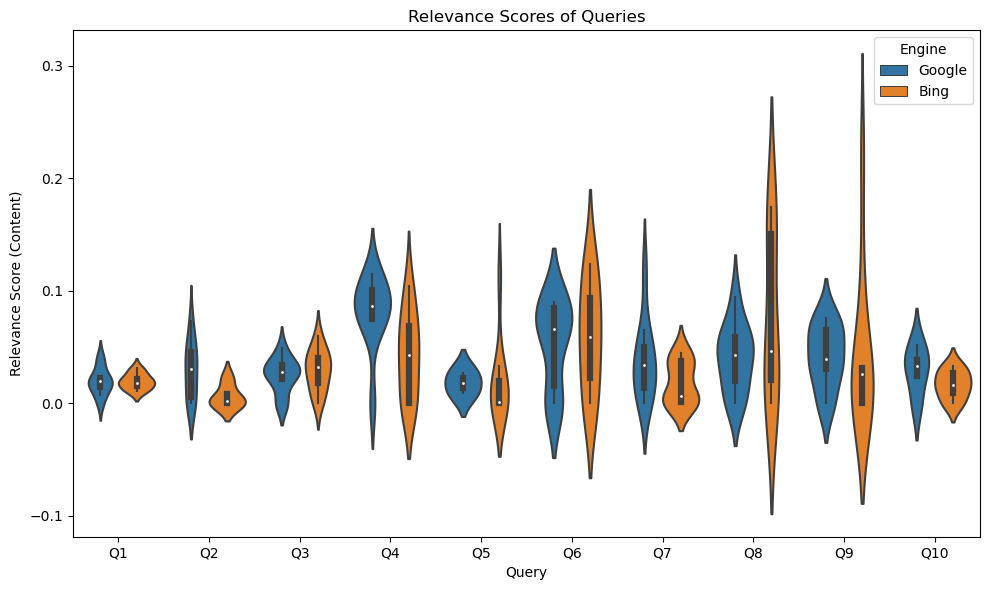

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_q", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()


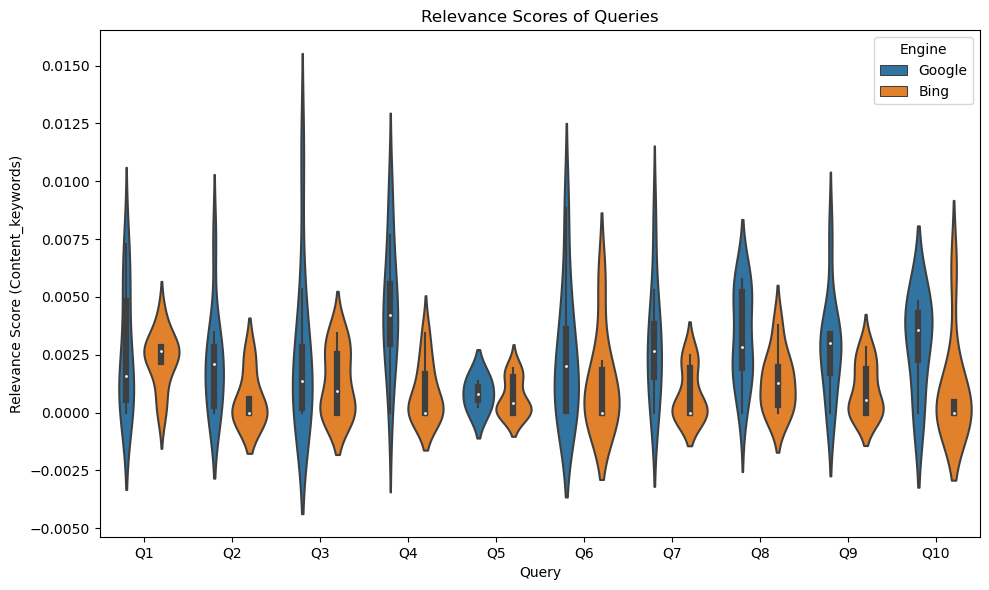

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_kw", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content_keywords)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()
